# Twitter Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robertdaly/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("tweets.csv", encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [4]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [5]:
df.shape

(9093, 3)

In [6]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [7]:
sent_df = df.drop('emotion_in_tweet_is_directed_at', axis=1)
sent_df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [8]:
sent_df.shape

(9093, 2)

In [9]:
sent_df.dropna(inplace=True)

In [10]:
sent_df.drop(index=9092, inplace=True)

In [11]:
sent_df.shape

(9091, 2)

In [12]:
sent_df['sentiment'] = sent_df['is_there_an_emotion_directed_at_a_brand_or_product']
sent_df.drop('is_there_an_emotion_directed_at_a_brand_or_product', axis = 1, inplace=True)

In [13]:
sent_df

,tweet_text,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9087,"@mention Yup, but I don't have a third app yet...",No emotion toward brand or product
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product


In [14]:
# Based on I don't know not being useful for our predictive model and there only being 156 data points, 
# we decided to drop these rows
sent_df.drop(sent_df.loc[sent_df['sentiment']=="I can't tell"].index, inplace=True)

In [15]:
sent_df.shape

(8935, 2)

## NLP Preprocessing

In [16]:
# Create an intance of the RegexpTokenizer with the variable name `tokenizer`
# The regex pattern should select all words with three or more characters
tokenizer = RegexpTokenizer(pattern=r"(?u)[\w#]{3,}")

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')
# Can add to stopwords_list here
stopwords_list.extend(['#sxsw', 'mention', 'googl', 'link', 'ipad','quot', 'appl', 'iphon', 'store', 'circl'])
stopwords_list.extend(['new','app','austin','like','launch','pop','sxsw', 'line', 'get', 'amp'])

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = PorterStemmer()

In [17]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# CodeGrade step2
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    text = text.lower()
    # Tokenize text using `tokenizer`
    tokenized_text = tokenizer.tokenize(text)
    # Remove stopwords using `stopwords_list`
    filtered_text = [token for token in tokenized_text if token not in stopwords_list]
    # Stem the tokenized text using `stemmer`
    stemmed_text = [stemmer.stem(token) for token in filtered_text]
    # Remove stopword stems using extended `stopwords_list`
    stemmed_filtered_text = [token for token in stemmed_text if token not in stopwords_list]
    # Return the preprocessed text (do not join, just return the list of tokens)
    return stemmed_filtered_text
# preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)
# preprocess_text(sent_df['tweet_text'][2], tokenizer, stopwords_list, stemmer)
sent_df['preprocessed_text'] = sent_df['tweet_text'].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))

In [19]:
sent_df[:]

,tweet_text,sentiment,preprocessed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,"[wesley83, hr, tweet, #rise_austin, dead, need..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,"[jessede, know, fludapp, awesom, appreci, desi..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,"[swonderlin, wait, #ipad, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,"[hope, year, festiv, crashi, year]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,"[sxtxstate, great, stuff, fri, marissa, mayer,..."
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",No emotion toward brand or product,"[yup, third, yet, android, suggest]"
9088,Ipad everywhere. #SXSW {link},Positive emotion,[everywher]
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,"[wave, buzz, interrupt, regularli, schedul, ge..."
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,"[zeiger, physician, never, report, potenti, ye..."


In [20]:
df['tweet_text'][47]

'HOORAY RT \x89ÛÏ@mention Apple Is Opening A Pop-Up Store In Austin For #SXSW | @mention {link}'

In [21]:
sent_df['tweet_text']

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9087    @mention Yup, but I don't have a third app yet...
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
Name: tweet_text, Length: 8935, dtype: object

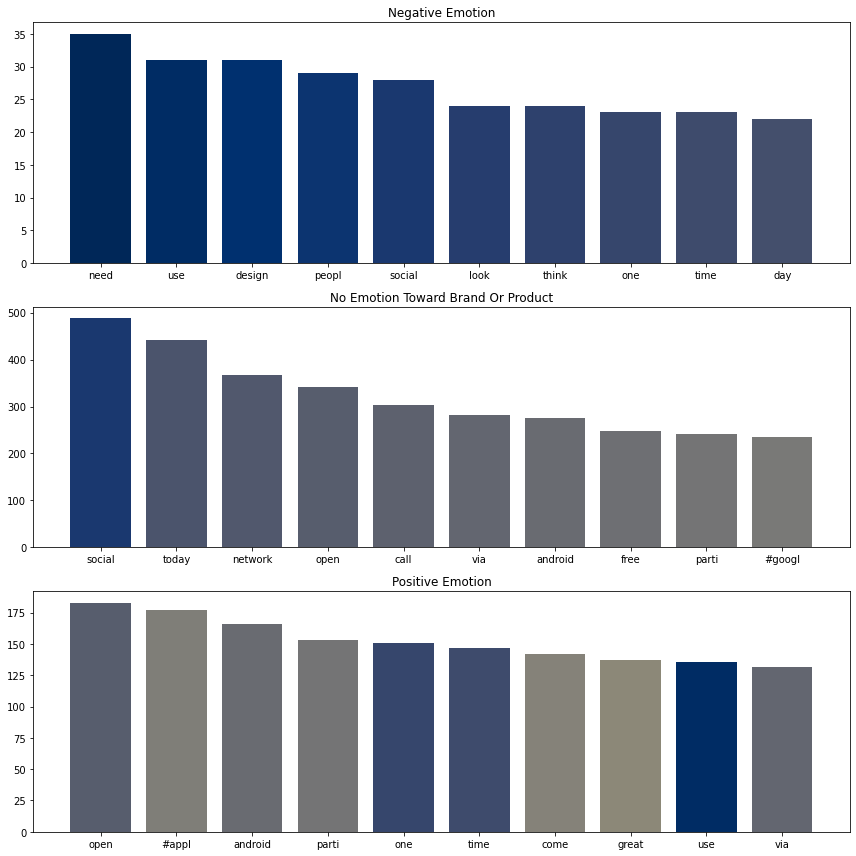

In [22]:
# Run this cell without changes
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axes = plt.subplots(nrows=3, figsize=(12, 12))

# Empty dict to hold words that have already been plotted and their colors
plotted_words_and_colors = {}
# Establish color palette to pull from
# (If you get an error message about popping from an empty list, increase this #)
color_palette = sns.color_palette('cividis', n_colors=38)

# Creating a plot for each unique genre
data_by_sent = [y for _, y in sent_df.groupby('sentiment', as_index=False)]
for idx, sent_df in enumerate(data_by_sent):
    # Find top 10 words in this genre
    all_words_in_sent = sent_df.preprocessed_text.explode()
    top_10 = all_words_in_sent.value_counts()[:10]
    
    # Select appropriate colors, reusing colors if words repeat
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])
    
    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(sent_df.iloc[0].sentiment.title())
    
fig.tight_layout()

## NLP Vectorizing

In [23]:
cv = CountVectorizer(stop_words='english')

In [ ]:
from sklearn.model_selection import train_test_split

# Convert token lists to strings
data["joined_preprocessed_text"] = data["preprocessed_text"].str.join(" ")

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(
    data["joined_preprocessed_text"], data.sentiment, test_size=0.3, random_state=2021)

X_train